In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("student.csv", index_col= 0)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#cheching for null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
df.select_dtypes(["category", "object"])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
1,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
2,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
3,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
4,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
5,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
392,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
393,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
394,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [5]:
df.select_dtypes(exclude = ["category", "object"])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
2,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
3,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
4,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
5,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
392,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
393,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
394,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [6]:
# catagorical encoding for the dataset

colnames  = []
for colname in df.select_dtypes(["category", "object"]):
    df[colname],_ = df[colname].factorize()
    colnames.append(colname)
df[colnames]

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,1,0
3,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,2,2,0,1,1,1,1,0,0,1,1
5,0,0,0,0,1,2,1,2,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1,1,0,1,0,3,2,0,2,1,1,1,0,0,0,0,0
392,1,1,0,1,1,3,2,0,0,1,0,0,0,1,0,1,0
393,1,1,1,0,1,2,1,0,2,1,0,0,0,1,0,0,0
394,1,1,1,1,1,3,1,0,0,1,0,0,0,1,0,1,0


In [7]:
corr_matrix = df.corr()

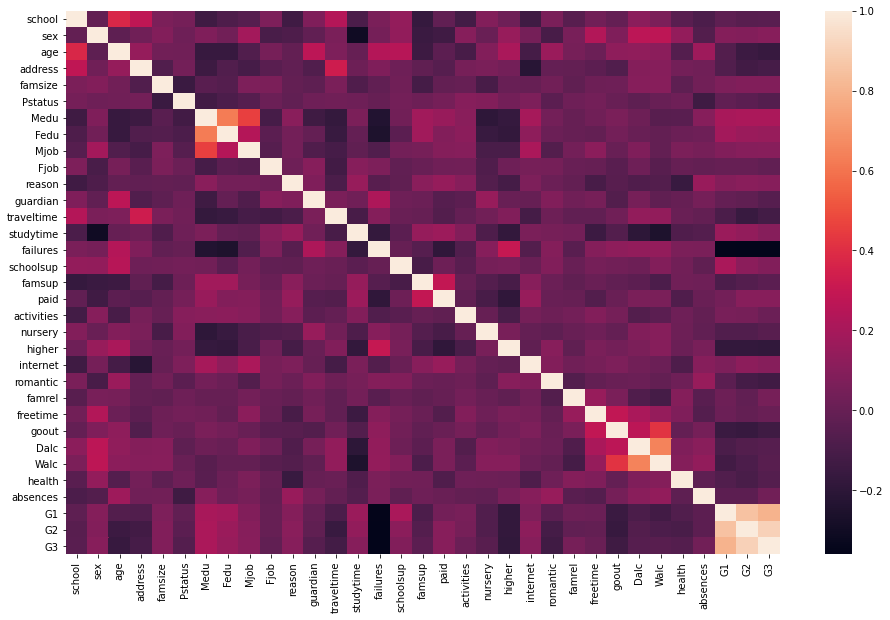

In [33]:
plt.figure(figsize = (16,10))
sns.heatmap(data= corr_matrix, annot=False)
plt.savefig("heatmap.png")

In [9]:
# from the heat map we can see that G1,G2 have a very high co-relation with G3 the target variable.
# Medu,Mjob,Fedu also are co-retated to each other but have less co relation with the G3 value.
# Simmilarly goout, Dalc,Walc are co-retated to each other but have very less co relation with the G3 value.

In [10]:
relations = []
for ind, val in corr_matrix['G3'].iteritems():
    if val>=0.17 or val<=-0.17:
        relations.append(ind)
relations

['Medu', 'failures', 'higher', 'G1', 'G2', 'G3']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

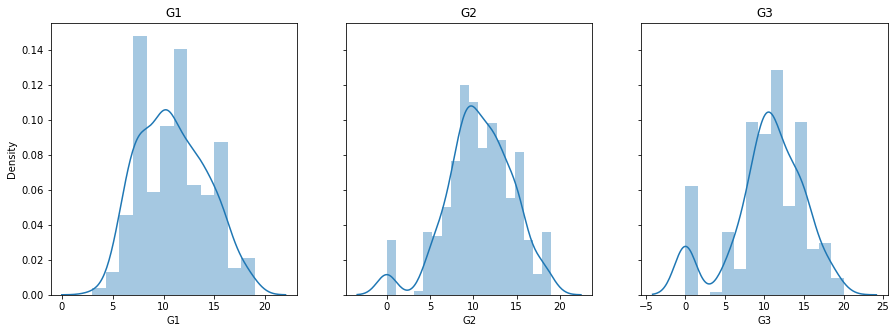

In [34]:
fig , axes  = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.distplot(df['G1'], kde=True, ax=axes[0])
axes[0].set_title('G1')
sns.distplot(df['G2'], kde=True, ax=axes[1])
axes[1].set_title('G2')
sns.distplot(df['G3'], kde=True, ax=axes[2])
axes[2].set_title('G3')

plt.savefig("distplots.png")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

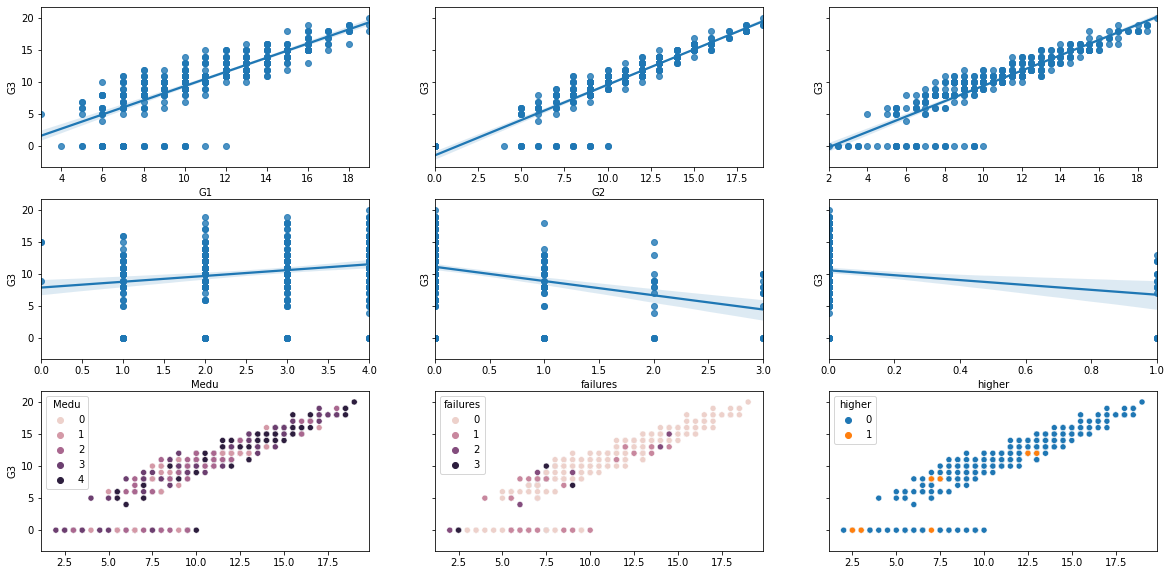

In [35]:
fig2 , axes2 = plt.subplots(3, 3, figsize=(20, 10), sharey=True)

sns.regplot(df['G1'], df['G3'], ax=axes2[0,0])
sns.regplot(df['G2'], df['G3'], ax=axes2[0,1])
sns.regplot((df['G1']+df['G2'])/2, df['G3'], ax=axes2[0,2])

sns.regplot(df['Medu'], df['G3'], ax=axes2[1,0])
sns.regplot(df['failures'], df['G3'], ax=axes2[1,1])
sns.regplot(df['higher'], df['G3'], ax=axes2[1,2])

sns.scatterplot((df['G1']+df['G2'])/2, df['G3'], ax=axes2[2,0], hue = df['Medu'])
sns.scatterplot((df['G1']+df['G2'])/2, df['G3'], ax=axes2[2,1], hue = df['failures'])
sns.scatterplot((df['G1']+df['G2'])/2, df['G3'], ax=axes2[2,2], hue = df['higher'])

plt.savefig("scatterplots.png")

In [13]:
shuffled_df = df.reindex(np.random.permutation(df.index))

shuffled_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
76,0,1,15,0,0,1,4,3,4,1,...,4,3,3,2,3,5,6,9,9,10
207,0,0,16,0,0,0,3,1,3,1,...,2,3,3,2,2,4,5,7,7,7
388,1,0,19,1,0,1,2,3,3,1,...,5,4,2,1,2,5,0,7,5,0
142,0,1,16,0,1,1,2,2,3,2,...,2,3,3,2,2,2,8,9,9,9
272,0,0,18,0,0,1,2,3,2,2,...,4,5,5,1,3,2,4,15,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,1,0,18,1,1,1,4,4,4,2,...,5,4,3,3,4,2,4,8,9,10
336,0,0,17,0,0,1,3,4,3,1,...,4,4,5,1,3,5,16,16,15,15
77,0,1,15,0,0,1,4,0,4,1,...,3,4,3,1,1,1,8,11,11,10
45,0,0,16,0,1,1,2,2,2,4,...,4,3,3,2,2,5,14,10,10,9


In [25]:
X = (shuffled_df['G1']+shuffled_df['G2'])/40
X

76     0.450
207    0.350
388    0.300
142    0.450
272    0.725
       ...  
378    0.425
336    0.775
77     0.550
45     0.500
354    0.400
Length: 395, dtype: float64

In [26]:
y = shuffled_df['G3']/20
y

76     0.50
207    0.35
388    0.00
142    0.45
272    0.70
       ... 
378    0.50
336    0.75
77     0.50
45     0.45
354    0.40
Name: G3, Length: 395, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=0.2,random_state=0)

train_X.shape,train_y.shape, val_X.shape, val_y.shape

((316,), (316,), (79,), (79,))

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(np.array(train_X).reshape(-1, 1),np.array(train_y).reshape(-1, 1))

LinearRegression()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


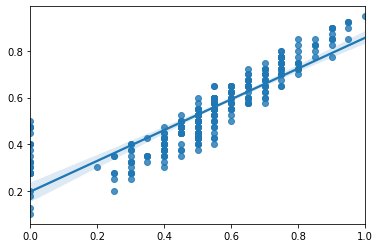

In [36]:
sns.regplot(np.array(train_y).reshape(-1, 1), np.array(train_X).reshape(-1, 1))

plt.savefig("regressionplot.png")

In [30]:
model.coef_, model.intercept_

(array([[1.17275541]]), array([-0.11151271]))

In [31]:
from math import sqrt
pred_y = model.predict(np.array(val_X).reshape(-1, 1))

mse = mean_squared_error(val_y, pred_y)
rmse = sqrt(mse) 
r2 =  r2_score(val_y, pred_y)

mse, rmse, r2

(0.00984681464304563, 0.09923111731229085, 0.8394388687317985)